In [ ]:
#Accuracy of 92% with Decision Classifier

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv("D:\BreastCancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [28]:
#from above we can see that column id and Unnamed seems to be unuseful for the prediction,so we drop them
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.drop(['id'], axis=1, inplace=True)


In [29]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
#datatypes of the columns
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [32]:
# we can see that column diagnosis is categorical variable which is our target variable
# before converting it to numerical values we run some more test to find out null values and missing values 

In [33]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [34]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
# we can see that there is not any null values or missing values in the data which made us easier

In [43]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


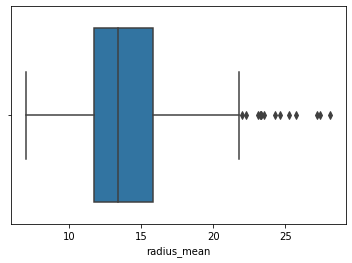

In [42]:
sns.boxplot(x=df['radius_mean'])
plt.show()

In [45]:
#unique categorical data of column diagnosis
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [62]:
#lets separate dependent and independent variables for the prediction
X = df.drop('diagnosis',axis =1).copy()
X.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [63]:
X.head().T

,0,1,2,3,4
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


In [64]:
y = df['diagnosis'].copy()

In [65]:
y.head().T

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [66]:
# as we can see that reponse variable is categorical which Dtype is object, so we gonna change it to numerical value
y.replace('M','1',regex= True, inplace=True)
y.replace('B','0', regex= True, inplace= True)
y.dtypes


dtype('O')

In [67]:
#converting the datatype to interger
y= pd.to_numeric(y)

In [68]:
y.dtypes

dtype('int64')

In [71]:
#creating the Initial Model
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)


In [76]:
#shape of X_testset and y_testset, insuring the dimension matches
print('Shape of X training set {}'.format(x_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (398, 30) &  Size of Y training set (398,)


In [141]:
bc_dt = DecisionTreeClassifier()
bc_dt = bc_dt.fit(x_train, y_train)

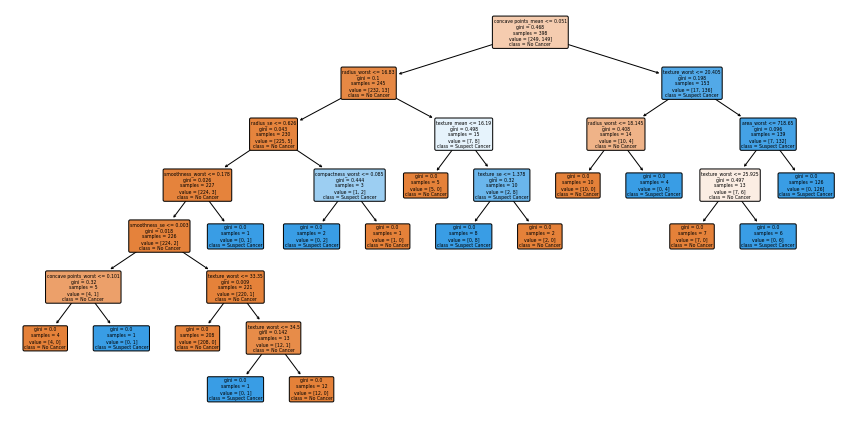

In [142]:
plt.figure(figsize=(15,7.5))
plot_tree(bc_dt, 
          filled=True,
          rounded=True,
          class_names= ['No Cancer','Suspect Cancer'],
             feature_names=X.columns)
plt.show()

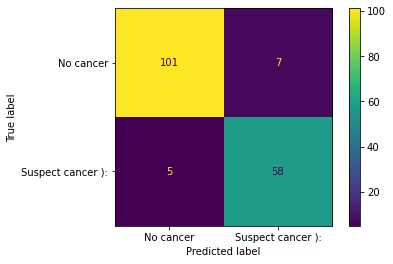

In [143]:
plot_confusion_matrix(bc_dt,x_test,y_test,display_labels=['No cancer','Suspect cancer ):'])

In [144]:
y_train_pred = bc_dt.predict(x_train)
y_test_pred = bc_dt.predict(x_test)

In [145]:
print(accuracy_score(y_train,y_train_pred), round(accuracy_score(y_test,y_test_pred),2))

1.0 0.93


In [92]:
#we can see here the accuracy score of train and test data is 1.0 and 0.93 respectively. 
#So we can suspect that the our might be overfitted i.e our model memorized the train set
#but was not able perform equally in test data, but it was close
# lets go for CCP(Cost-Complexity Pruning), it helps to overcome the problem of overfitting

In [100]:
path = bc_dt.cost_complexity_pruning_path(x_train, y_train)
#values of ccp_aplhas
path.ccp_alphas
#values of impurities
path.impurities

array([0.        , 0.00996131, 0.01331139, 0.01822623, 0.02457942,
       0.03261962, 0.04333989, 0.05769739, 0.07393241, 0.09110182,
       0.10962226, 0.13779555, 0.46843514])

In [102]:
#Greater values of ccp_alpha increase the number of nodes pruned.

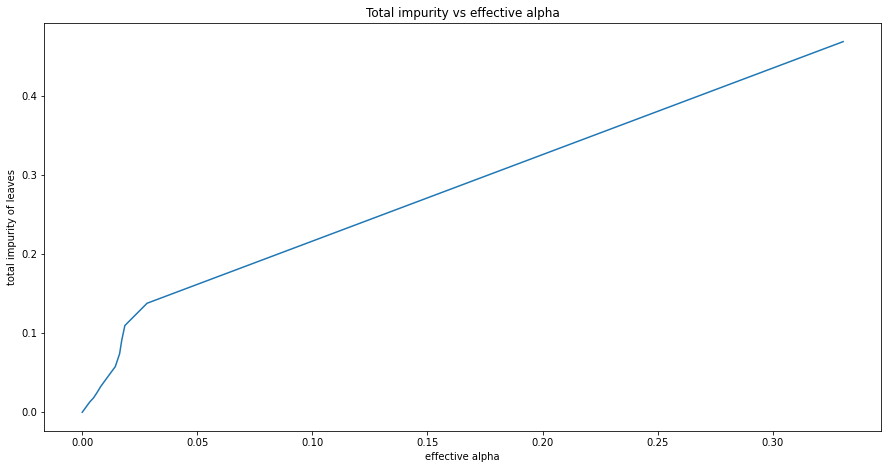

In [117]:
plt.figure(figsize=(15, 7.5))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total impurity vs effective alpha")
plt.show()

In [119]:
#excluding the max value of alpha
ccp_alphas = path.ccp_alphas[:-1]

bc_dts =[]
#making an array of ccp alphas
for ccp_alpha in ccp_alphas:
    bc_dt = DecisionTreeClassifier(ccp_alpha= ccp_alpha)
    bc_dt.fit(x_train,y_train)
    bc_dts.append(bc_dt)

In [120]:
bc_dts

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.002490327744919282),
 DecisionTreeClassifier(ccp_alpha=0.003350083752093802),
 DecisionTreeClassifier(ccp_alpha=0.0049148318490037),
 DecisionTreeClassifier(ccp_alpha=0.006353192252522264),
 DecisionTreeClassifier(ccp_alpha=0.008040201005025125),
 DecisionTreeClassifier(ccp_alpha=0.010720268006700168),
 DecisionTreeClassifier(ccp_alpha=0.014357501794687725),
 DecisionTreeClassifier(ccp_alpha=0.01623502126014689),
 DecisionTreeClassifier(ccp_alpha=0.017169410972961114),
 DecisionTreeClassifier(ccp_alpha=0.018520434173232327),
 DecisionTreeClassifier(ccp_alpha=0.02817329768633045)]

In [129]:
#ccp_alphas of train_score
train_scores = [bc_dt.score(x_train,y_train) for bc_dt in bc_dts]
#ccp_alphas of test_score
test_scores = [bc_dt.score(x_test,y_test) for bc_dt in bc_dts]

In [130]:
print('Train scores for respective ccp_aplha:',train_scores)
print('Test scores for respective ccp_aplha:',test_scores)

Train scores for respective ccp_aplha: [1.0, 0.9949748743718593, 0.992462311557789, 0.9899497487437185, 0.9874371859296482, 0.9824120603015075, 0.9698492462311558, 0.9597989949748744, 0.9447236180904522, 0.9422110552763819, 0.9396984924623115, 0.9246231155778895]
Test scores for respective ccp_aplha: [0.9298245614035088, 0.9473684210526315, 0.9532163742690059, 0.9649122807017544, 0.9532163742690059, 0.9707602339181286, 0.9649122807017544, 0.9415204678362573, 0.9415204678362573, 0.9298245614035088, 0.9064327485380117, 0.8947368421052632]


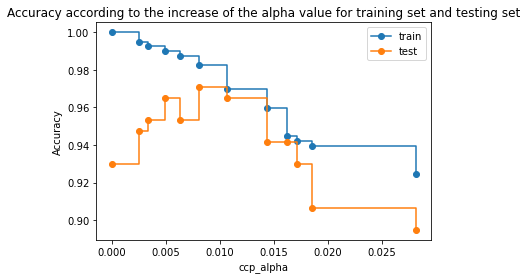

In [132]:
#we built a plot ccp_alpha vs accuracy
fig,ax=plt.subplots()
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy according to the increase of the alpha value for training set and testing set')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [133]:
#We can see that the accuracy is high between the alpha value of 0.000.. to 0.005


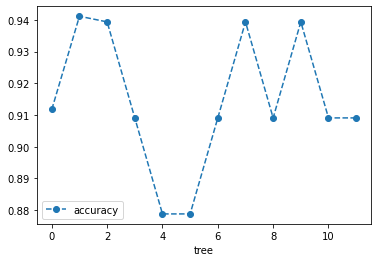

In [148]:
# we do the cross validation for more precision
# we see that prescision is more with nodes 7 and 9
bc_dt =DecisionTreeClassifier(ccp_alpha=0.0120)
scores = cross_val_score(bc_dt, x_train,y_train, cv=12)
df = pd.DataFrame(data={'tree': range(12), 'accuracy': scores})
df.plot(x='tree',y='accuracy', marker='o', linestyle= '--')
plt.show()

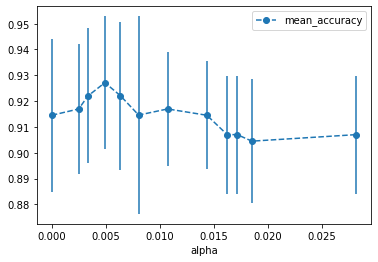

In [228]:
#calculating the mean accuracy and std for the respective alpha values
alpha_values = []
for ccp_alpha in ccp_alphas:
    bc_dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores = cross_val_score(bc_dt, x_train, y_train,cv=12)
    alpha_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_values, columns=['alpha','mean_accuracy', 'standard deviation'])
alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr= 'standard deviation',
                  marker ='o',
                  linestyle='--')
plt.show()

In [229]:
alpha_results[(alpha_results['alpha']>0.002)
              &
             (alpha_results['alpha']<0.010)]

,alpha,mean_accuracy,standard deviation
1,0.002490,0.916964,0.025227
2,0.003350,0.922014,0.026161
3,0.004915,0.927139,0.025714
4,0.006353,0.922089,0.028600
5,0.008040,0.914587,0.038288


In [232]:

best_alpha=alpha_results[(alpha_results['alpha']>0.00250)
              &
             (alpha_results['alpha']<0.005)]['alpha']
best_alpha

2    0.003350
3    0.004915
Name: alpha, dtype: float64

In [233]:
#we see ths precision is highest at aplha 0.003350 and 0.004915
#but we will choose alpha= 0.03350(lowest value among the best )
#Building the tree of pruned dataset
best_ccp_alpha =0.003350
